# Preparación y lectura de datos 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

columns = ['Elevation',
'Aspect',
'Slope',
'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways',
'Hillshade_9am',
'Hillshade_Noon',
'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points'] # Columnas de la tabla
for i in range(1,5):
    #print(f"Wilderness_Area_{i}")
    columns.append(f"Wilderness_Area_{i}")
for i in range(1,41):
    #print(f"Soil_Type_{i}")
    columns.append(f"Soil_Type_{i}")
columns.append("Cover_Type") # variable a predecir

In [2]:
covtype = pd.read_table('covtype.data', sep=',', names=columns)

In [3]:
covtype.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points     ...      Soil_Type_32  Soil_Type_33  \
0                                6279     ...                 0             0   
1                                6225     ...                 0             0   
2                                6121     ...                 0             0   
3                                6211     ...                 0             0   
4                                6172     ...                 0             0   

   Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0           5  
1             0             0           5  
2             0             0           2  
3             0             0           2  
4             0             0           5  

[5 rows x 55 columns]

# Análisis exploratorio de datos 
## Variables cuantitativas

<IPython.core.display.Javascript object>


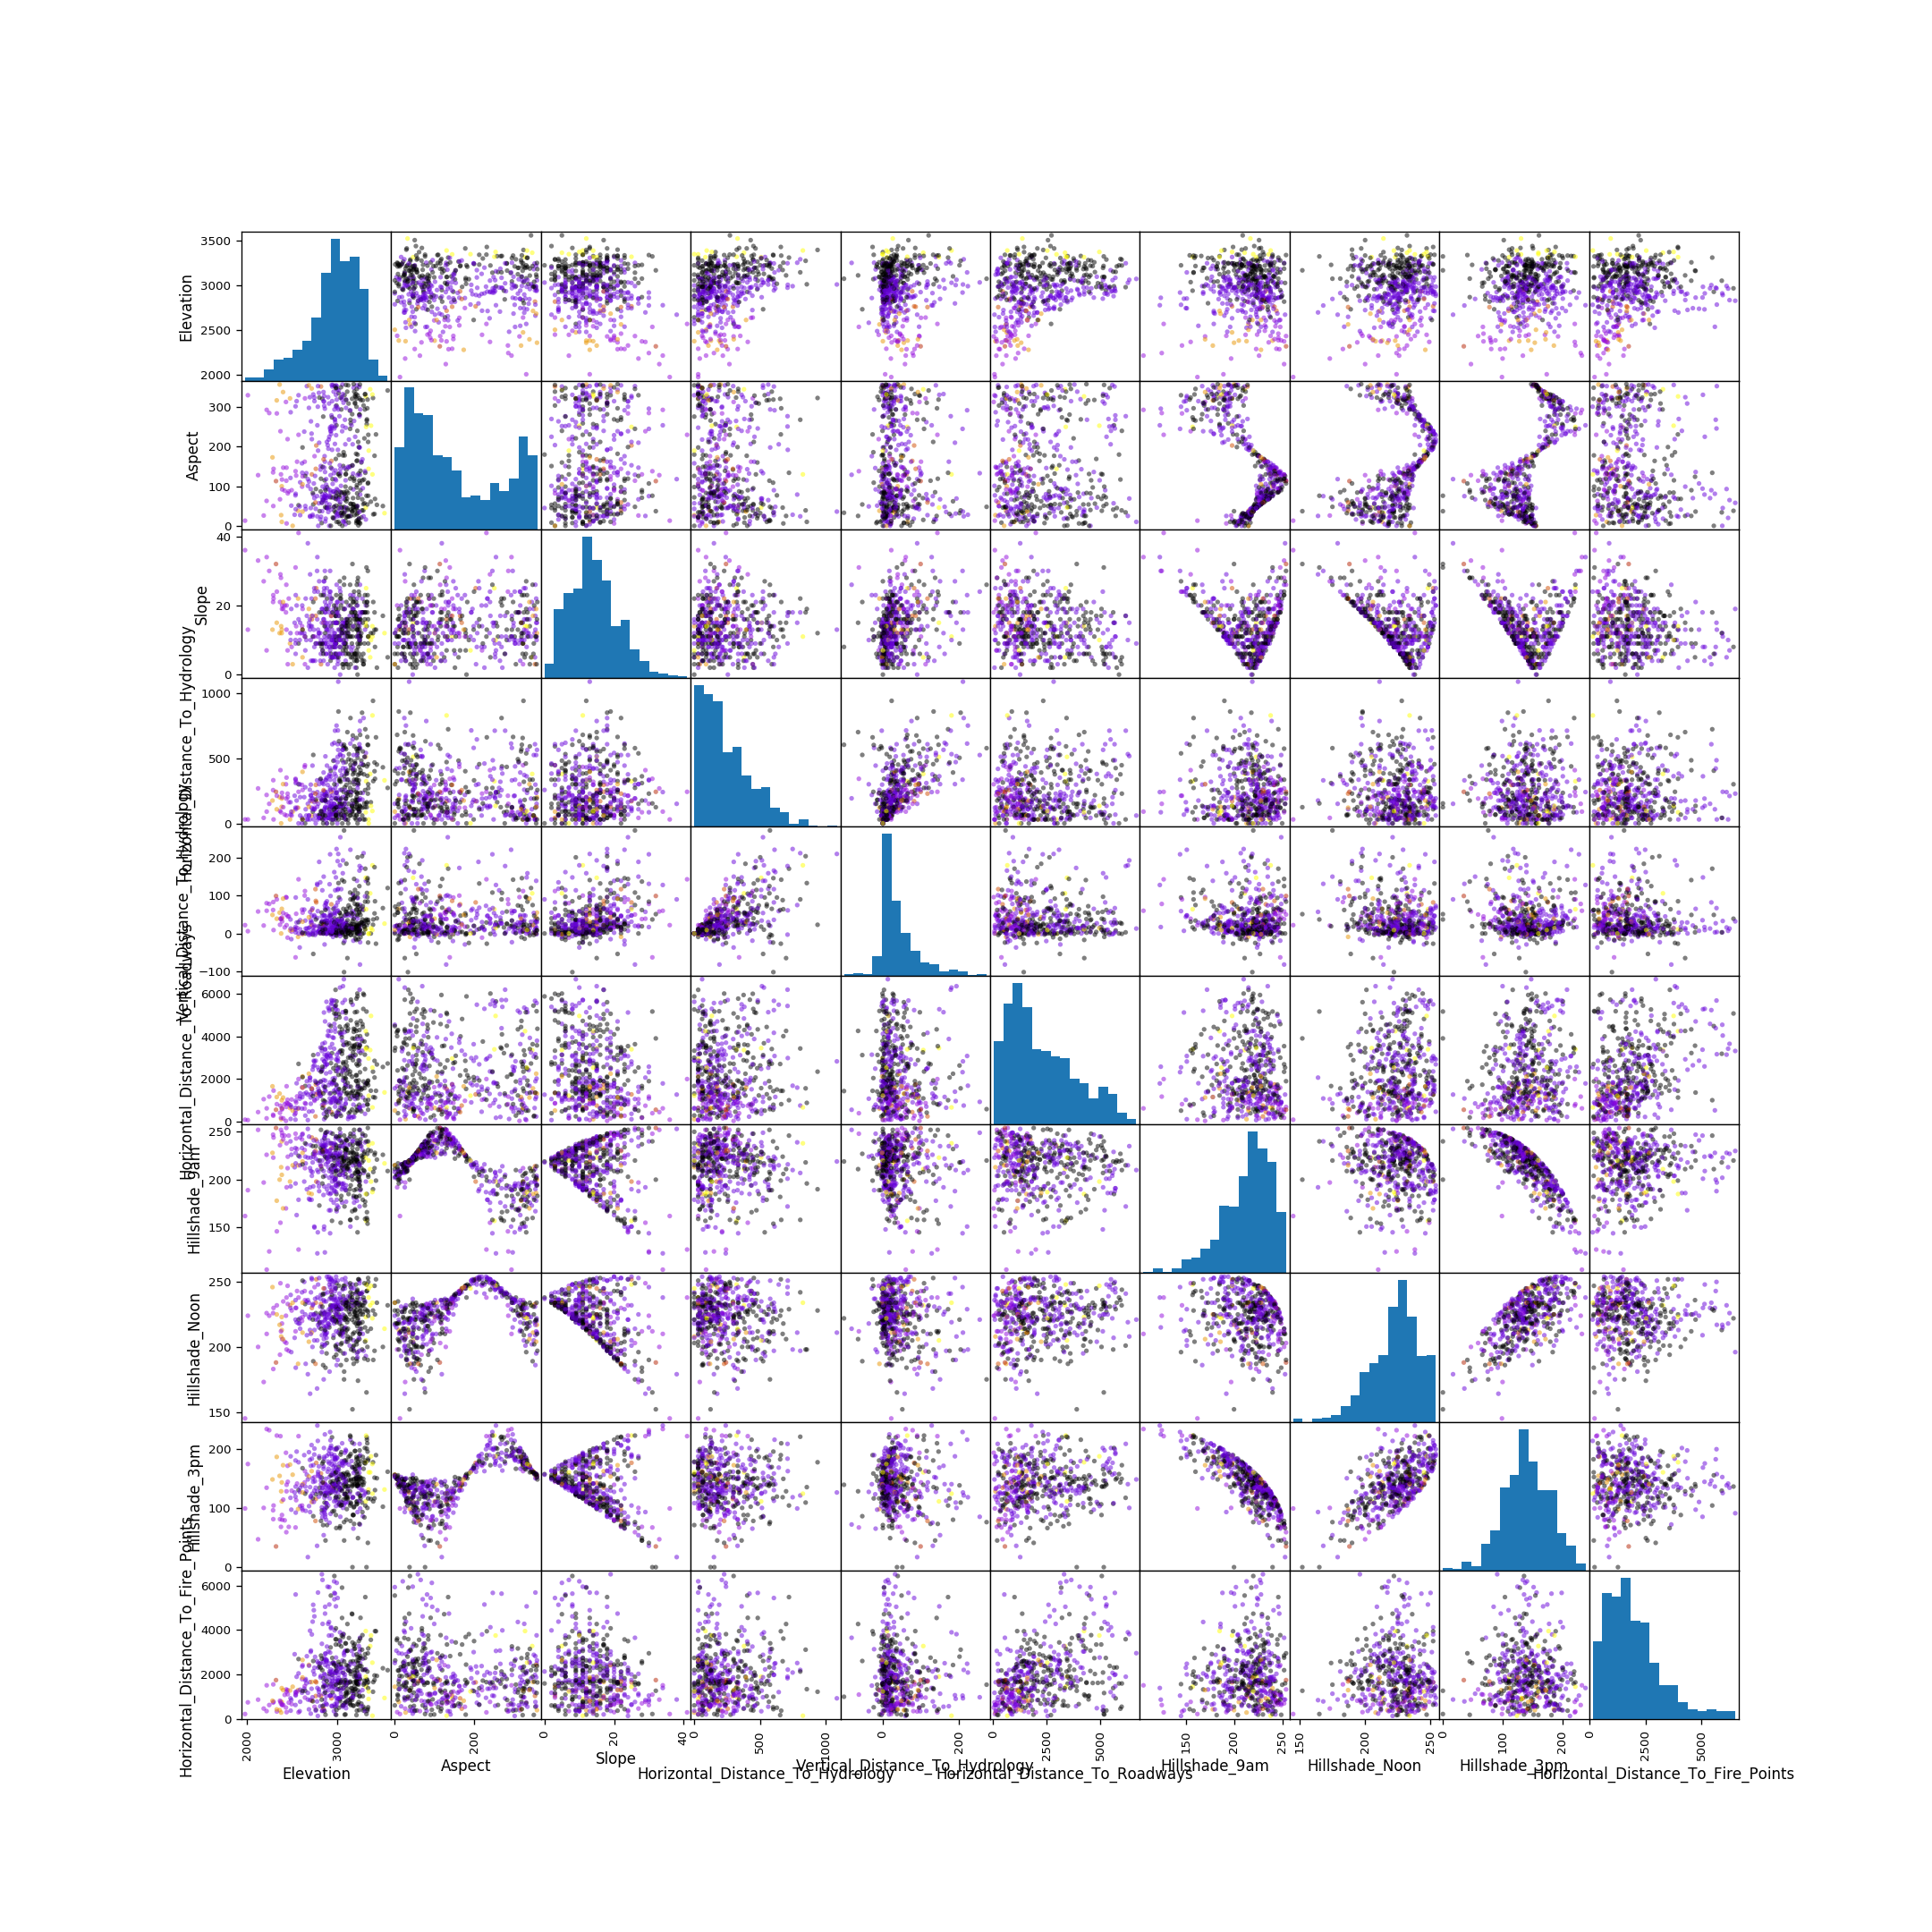

In [4]:
# plotting a scatter matrix
from matplotlib import cm
covtype_sample = covtype.sample(500) # Muestra aleatorea para visualizar patrones
X = covtype_sample[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]
y = covtype_sample['Cover_Type']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c= y, marker = 'o', s=10, hist_kwds={'bins':15}, figsize=(18,18), cmap=cmap)

**MinMax Scaler**

In [5]:
# Normalizar
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

<IPython.core.display.Javascript object>


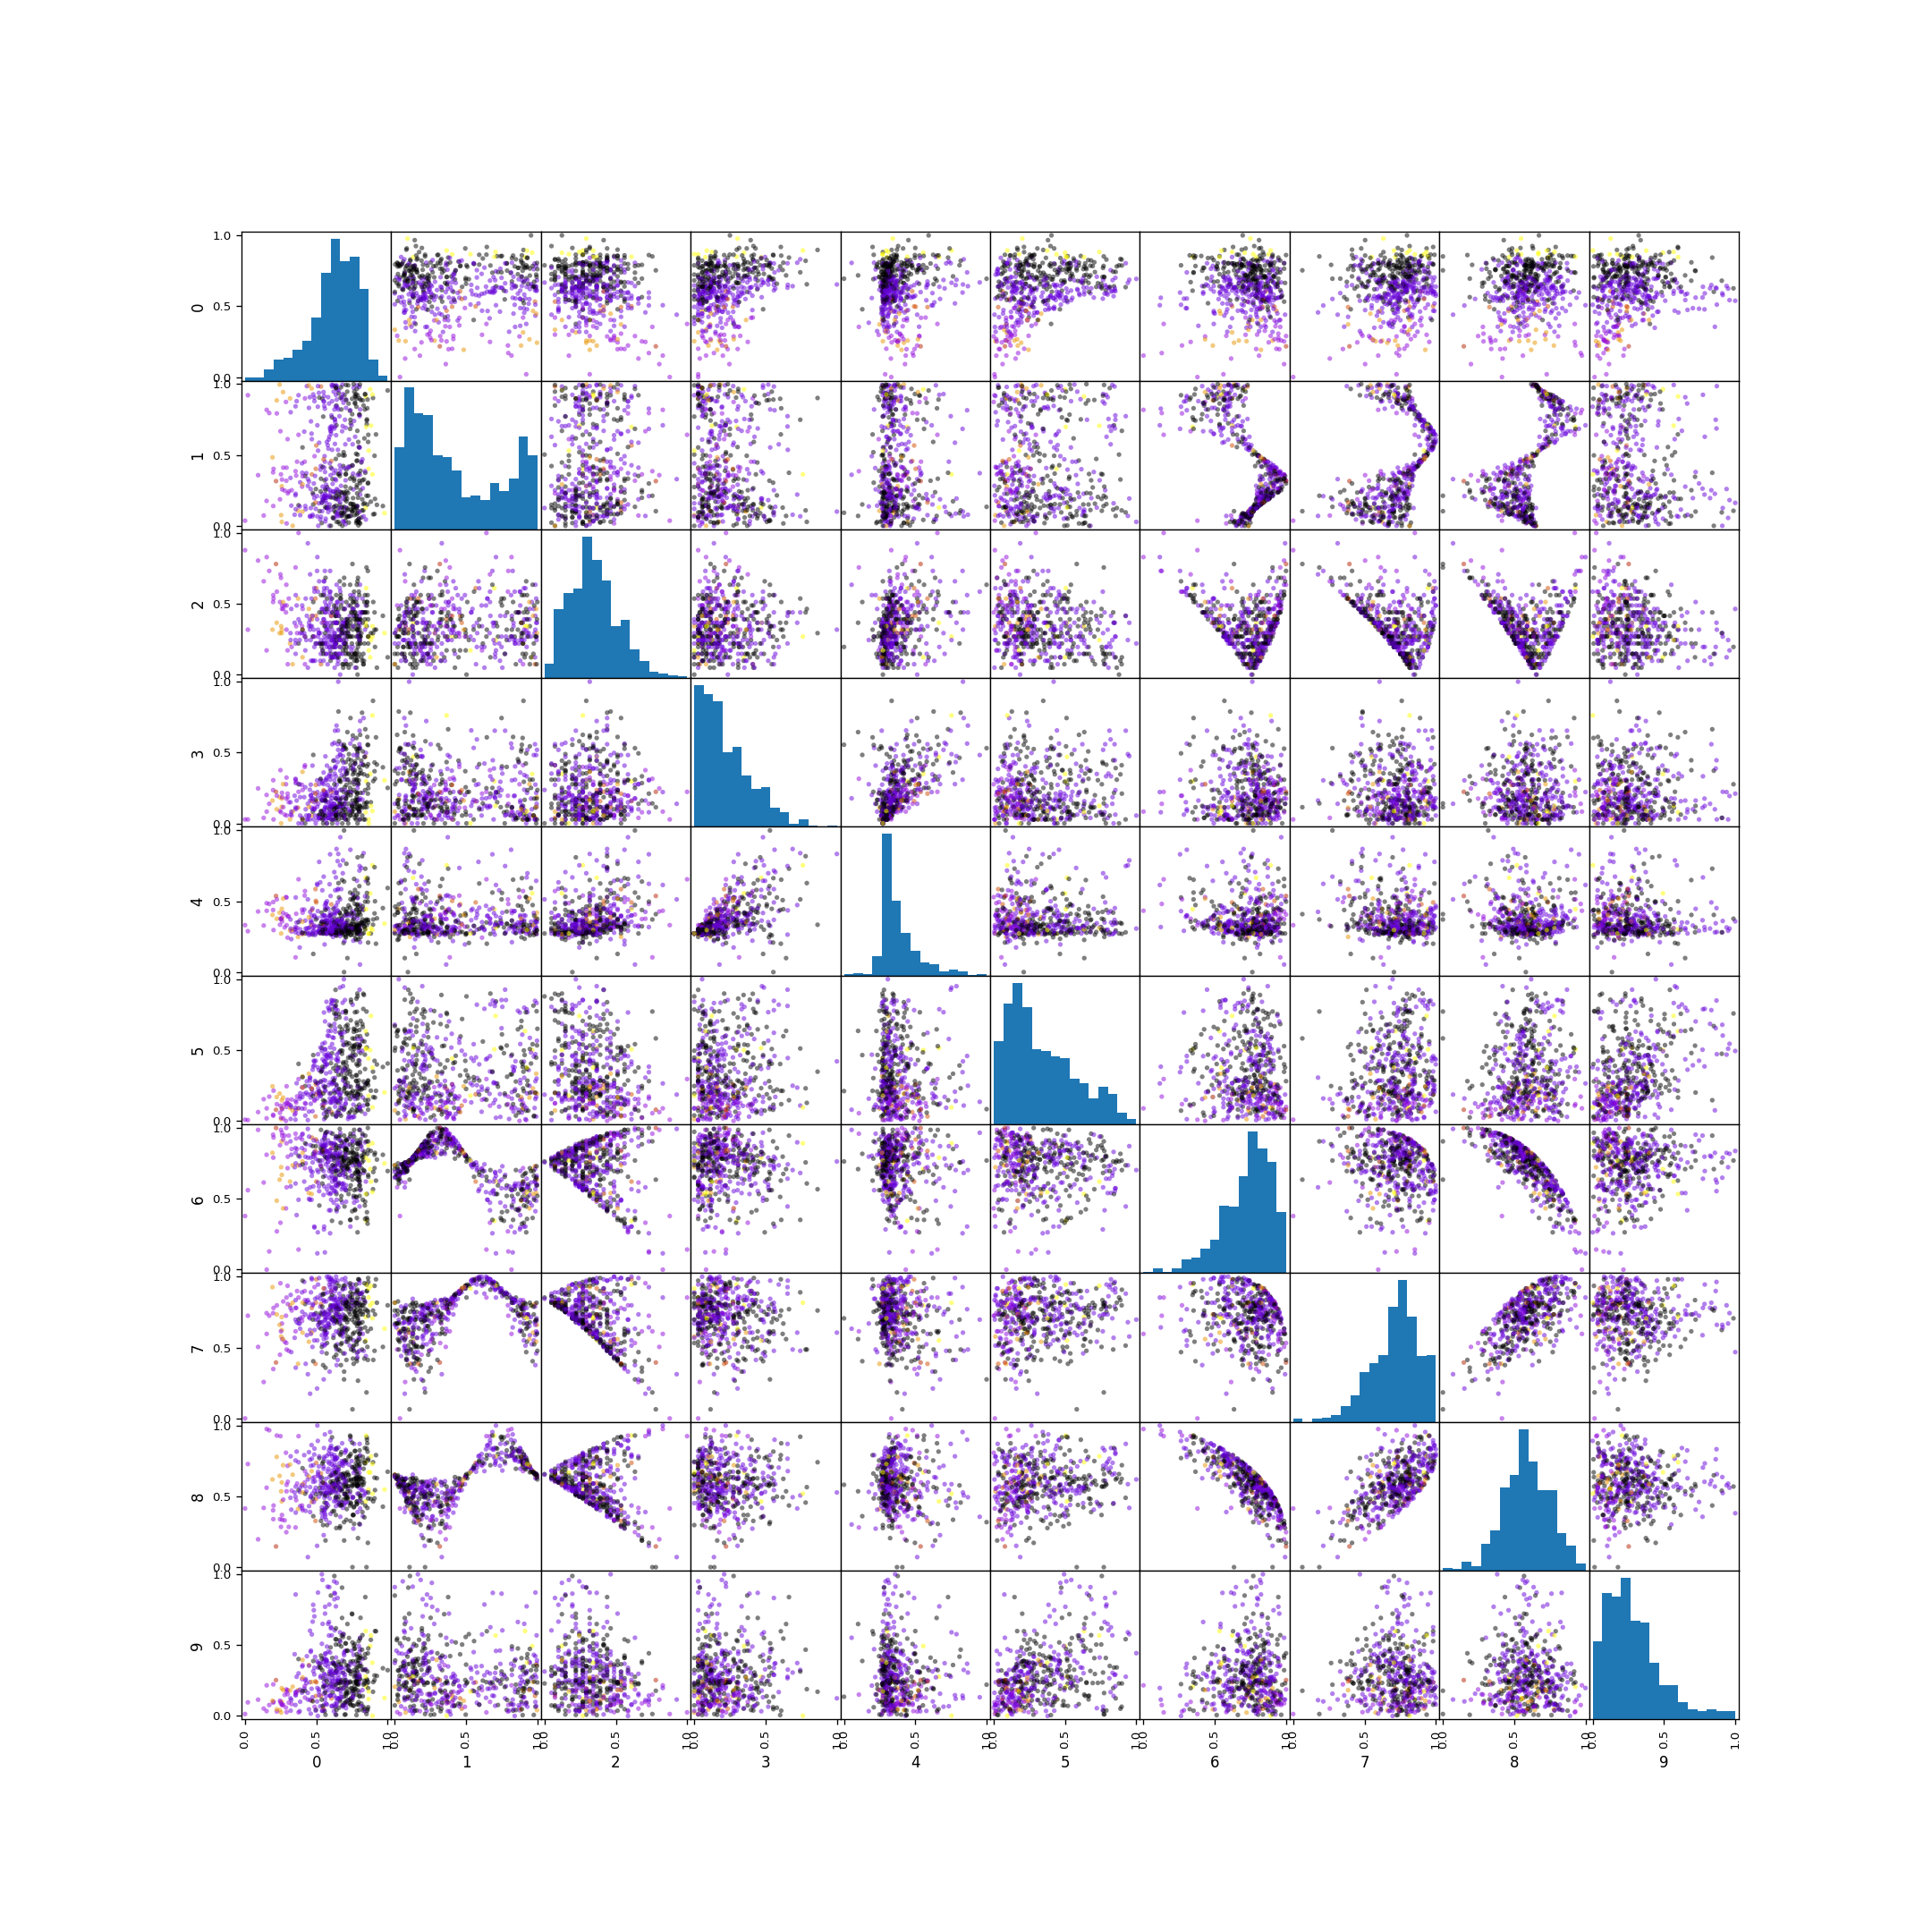

In [6]:
scatter = pd.plotting.scatter_matrix(pd.DataFrame(X_scaled), c= y, marker = 'o', s=10, hist_kwds={'bins':15}, figsize=(18,18), cmap=cmap)

**Estadisticas generales**

In [4]:
covtype[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']].describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count  581012.000000                       581012.000000  
mean      142.528263                         1980.291226  
std        38.274529                         1324.195210  
min         0.000000                            0.000000  
25%       119.000000                         1024.000000  
50%       143.000000                         1710.000000  
75%       168.000000                         2550.000000  
max       254.000000                         7173.000000

## Variables Cualitativas

En las siguientes celdas se revisara si hay columnas cualitativas que contienen solo una categoria(0 ó 1) 

In [5]:
for i in range(1,5):
    print(covtype[f"Wilderness_Area_{i}"].value_counts(normalize=True)) # Distribución
    if len(covtype[f"Wilderness_Area_{i}"].unique())== 1:
        print(f"Wilderness_Area_{i}")

0    0.551135
1    0.448865
Name: Wilderness_Area_1, dtype: float64
0    0.948566
1    0.051434
Name: Wilderness_Area_2, dtype: float64
0    0.563926
1    0.436074
Name: Wilderness_Area_3, dtype: float64
0    0.936373
1    0.063627
Name: Wilderness_Area_4, dtype: float64


In [11]:
for i in range(1,41):
    print(covtype[f"Soil_Type_{i}"].value_counts(normalize=True))
    if len(covtype[f"Soil_Type_{i}"].unique())== 1:
        print(f"Delete Soil_Type_{i}")

0    0.994783
1    0.005217
Name: Soil_Type_1, dtype: float64
0    0.987048
1    0.012952
Name: Soil_Type_2, dtype: float64
0    0.991699
1    0.008301
Name: Soil_Type_3, dtype: float64
0    0.978665
1    0.021335
Name: Soil_Type_4, dtype: float64
0    0.997251
1    0.002749
Name: Soil_Type_5, dtype: float64
0    0.988684
1    0.011316
Name: Soil_Type_6, dtype: float64
0    0.999819
1    0.000181
Name: Soil_Type_7, dtype: float64
0    0.999692
1    0.000308
Name: Soil_Type_8, dtype: float64
0    0.998026
1    0.001974
Name: Soil_Type_9, dtype: float64
0    0.943832
1    0.056168
Name: Soil_Type_10, dtype: float64
0    0.978641
1    0.021359
Name: Soil_Type_11, dtype: float64
0    0.948416
1    0.051584
Name: Soil_Type_12, dtype: float64
0    0.969999
1    0.030001
Name: Soil_Type_13, dtype: float64
0    0.998969
1    0.001031
Name: Soil_Type_14, dtype: float64
0    0.999995
1    0.000005
Name: Soil_Type_15, dtype: float64
0    0.995103
1    0.004897
Name: Soil_Type_16, dtype: float64
0

## Variable a predecir(`Cover_Type`)

En la siguiente celda vamos a revisar la distribución de clases.

In [9]:
print(covtype.Cover_Type.value_counts())
print(covtype.Cover_Type.value_counts(normalize=True))

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64
2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64


## Crear Modelo Predictivo

El modelo que se va a usar es Gradient Boosted decision Tree. Ya que este modelo esta basado en arboles de decisión, nos permite usar variables categoricas y númericas, requiere poca memoria para hacer predicciones y es conocido por buena exactitud de predicción comparado a otros modelos.

Es poco propenso a overfiting debido al modelo de random forest unido con el gradiente que ayuda a generalizar.


- Conjunto de entrenamiento, evaluación y prueba

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
train_set = covtype.iloc[:11340]
eval_set = covtype.iloc[11340:11340+3780]
test_set = covtype.iloc[11340+3780:]

## Encontrar los mejores parametros
Vamos a calcular la exactitud para el modelo de evaluación y de entranamiento y asi encontrar los mejores parametros para generalizar nuestro modelo. En este caso los parametros: learning_rate y max_depth.

In [86]:
# grid search
learning_rate = [0.001, 0.01, 0.1]
max_depth = [3,4,5]

In [87]:
# Puede tardar 4 a 5 minutos
for l in learning_rate:
    for m in max_depth:
        print(l,m)
        clf = GradientBoostingClassifier(learning_rate = l, max_depth = m, random_state = 0)
        clf.fit(train_set.drop('Cover_Type', 1).values, train_set['Cover_Type'].values)
        print('Accuracy of GBDT classifier on training set: {:.2f}'
             .format(clf.score(train_set.drop('Cover_Type', 1).values, train_set['Cover_Type'].values)))
        print('Accuracy of GBDT classifier on evaluation set: {:.2f}'
             .format(clf.score(eval_set.drop('Cover_Type', 1).values, eval_set['Cover_Type'].values )))

0.001 3
Accuracy of GBDT classifier on training set: 0.62
Accuracy of GBDT classifier on evaluation set: 0.62
0.001 4
Accuracy of GBDT classifier on training set: 0.70
Accuracy of GBDT classifier on evaluation set: 0.69
0.001 5
Accuracy of GBDT classifier on training set: 0.74
Accuracy of GBDT classifier on evaluation set: 0.71
0.01 3
Accuracy of GBDT classifier on training set: 0.71
Accuracy of GBDT classifier on evaluation set: 0.70
0.01 4
Accuracy of GBDT classifier on training set: 0.76
Accuracy of GBDT classifier on evaluation set: 0.73
0.01 5
Accuracy of GBDT classifier on training set: 0.80
Accuracy of GBDT classifier on evaluation set: 0.76
0.1 3
Accuracy of GBDT classifier on training set: 0.85
Accuracy of GBDT classifier on evaluation set: 0.79
0.1 4
Accuracy of GBDT classifier on training set: 0.90
Accuracy of GBDT classifier on evaluation set: 0.82
0.1 5
Accuracy of GBDT classifier on training set: 0.95
Accuracy of GBDT classifier on evaluation set: 0.84


## Finalmente calculemos la exactitud para el conjunto de prueba `test_set`

En la celda anterior vimos que los mejores parametros fueron:
```python

learning_rate = 0.1
max_depth = 5
```

In [88]:
clf = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, random_state = 0)
clf.fit(train_set.drop('Cover_Type', 1).values, train_set['Cover_Type'].values)
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(test_set.drop('Cover_Type', 1).values, test_set['Cover_Type'].values )))

Accuracy of GBDT classifier on test set: 0.70
